# Invasione delle cavallette

Vogliamo analizzare numericamente la seguente equazione differenziale

\begin{align}
\dot x = rx\left(1-\frac{x}{k}\right) - \frac{x^2}{1+x^2}
\end{align}

dove $r$ e $k$ sono parametri. In particolare ci interessa studiare i punti di biforcazione.

Cominciamo ad importare un po' di pacchetti utili

In [1]:
import numpy as np                                  # libreria matematica
from scipy.integrate import odeint                  # altra libreria matematica    odeint e' per integrare le equazioni
import matplotlib.pyplot as plt                     # librerie grafiche
import seaborn



Risolvere numericamente un'equazione differenziale e' facilissimo: basta definire il campo vettoriale, il dato iniziale, 
specificare su che tempi vogliamo risolvere e usare *odeint*

final equilibrium = [ 0.55660845]


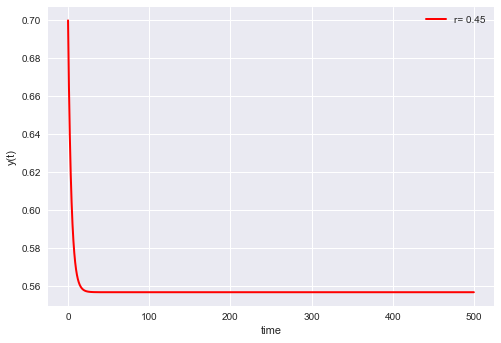

In [5]:
# function that returns dx/dt
def model(x,t,r):
    dxdt =  r* x*(1-(x/10)) - (x*x)/(1+x*x)
    return dxdt

# initial condition
x0 = 0.7

# time points
t = np.linspace(0,500, 10000)


# parameters
r1 = 0.45

# solve ODEs
y1 = odeint(model,x0,t,args=(r1,))            # risolve con parametro r1
print('final equilibrium = {0}'.format(y1[-1]))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='r= {}'.format( r1) )
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Adesso vogliamo mostrare i punti di equilibrio del sistema. Come possiamo fare? Ovviamente possiamo trovare gli zeri del campo vettoriale e plottarli. Tuttavia esiste una via alternativa, un filo piu' complicata, ma dinamica.
Basta infatti ricordarsi che 
* punti di equilibrio *stabile*: sono attrattori per la dinamica quando $t \to +\infty$
* punti di equilibrio *instabile*: sono attrattori quando $t \to -\infty$

L'idea allora e' questa: facciamo evolvere il nostro sistema da dati iniziali random. Guardiamo la soluzione dopo molto tempo: sara' andata a cadere su un punto di equilibrio stabile! Rifacendo la stessa cosa indietro del tempo, troviamo i punti di equilibrio instabili.

Cominciamo a generare dati iniziali random, distribuiti uniformemente in un intervallo

In [8]:
# numeri di punti iniziali
N = 20

#intervallo di dati
x_0_min = -1.0
x_0_max = 15.0

#tempo massimo
time_max = 500
# time points
t = np.linspace(0,time_max, 50000)


# genero N punti distribuiti random in maniera uniforme fra a e b
x_0 = x_0_min+ (x_0_max-x_0_min)*np.random.random(N)
x_0


array([ 11.14787761,  11.9628206 ,   6.44396341,   1.15374761,
         8.33788749,   5.56848506,   9.55868761,   2.94348962,
        10.65439044,   0.89646427,  13.48587915,  10.37099852,
         3.91556494,  10.24896949,  14.59497721,   5.30114392,
        -0.43029979,  11.18879915,   5.78049053,   8.08974325])

A questo punto per ciascun dato iniziale, risolvo l'equazione differenziale avanti del tempo ed indietro nel tempo. Poi plottiamo i valori finali

/Users/albertomaspero/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/albertomaspero/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


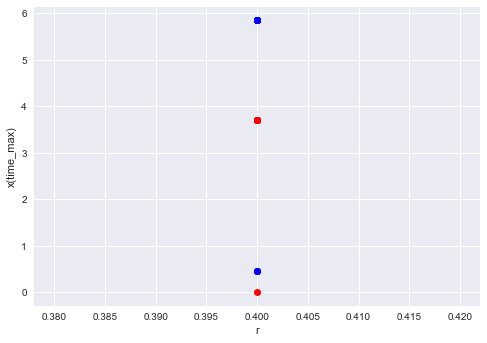

In [10]:
# in questo funzione plottiamo i punti di equilibrio stabili ed instabili dato r

for x0i in x_0:
    #risolvo l'equazione con dato iniziale x0i e parametro r1
    yi= odeint(model,x0i,t ,mxstep=500000, args=(r1,))
    #plotto r ed il valore raggiunto dall'equazione al tempo time_max: sono i punti di equilibrio stabili
    plt.plot(r1,yi[-1],'o', color = 'blue' )
    
    #adesso risolvo indietro nel tempo per trovare i punti instabili: i repulsori sono attrattori 
    # quando il tempo va e meno infinito!!
    zi= odeint(model,x0i, -t,mxstep=500000,args=(r1,))
    #plotto r ed il valore raggiunto dall'equazione al tempo time_max: sono i punti di equilibrio stabili
    plt.plot(r1,zi[-1],'o', color = 'red' )
    
plt.xlabel('r')
plt.ylabel('x(time_max)')
plt.show()

Vogliamo vedere come i punti di equilibrio cambiano in funzione di $r$

/scratch/amaspero/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


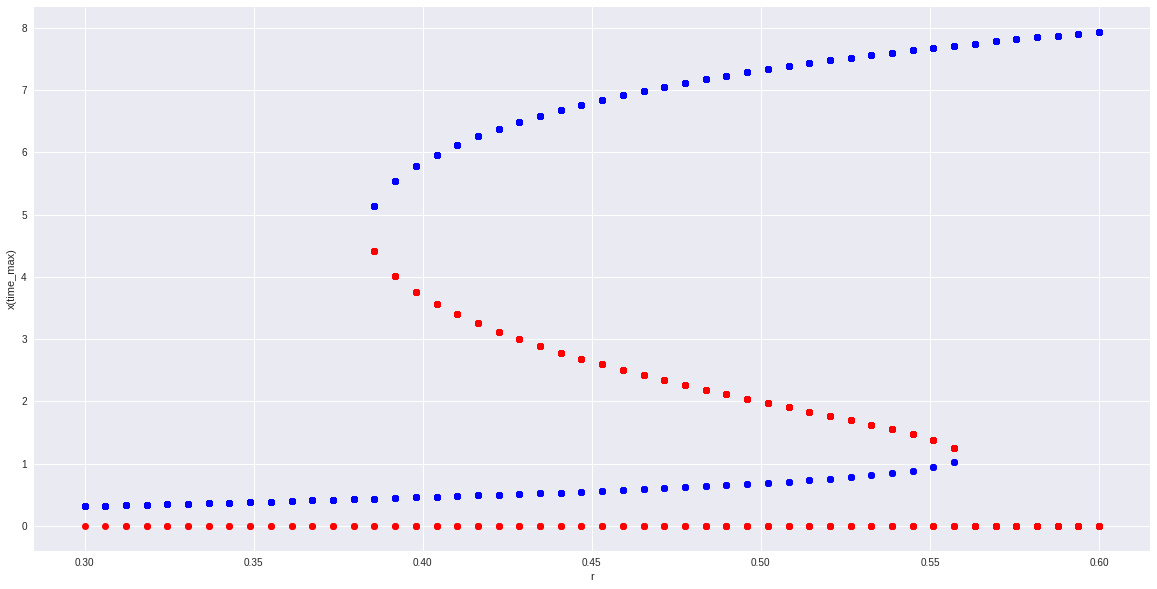

In [33]:
x_0 = np.array([  6.62057445,  -0.30144453,  14.41076111,   4.6445419 ,
        14.98940538,   5.49504881,   7.19267983,  10.49342065,
         3.10442128,  10.3885063 ,  10.00763801,   6.85687199,
         9.88138589,   0.45014949,   0.62779268,   2.35934398,
         1.64940631,   2.75896693,   0.32999916,  12.97795719])

np.seterr(divide='ignore', invalid='ignore')
plt.figure(figsize=(20,10))

def punti_equilibrio(x, t, r):
    for ri in r:
        for x0i in x_0:
            #risolvo l'equazione con dato iniziale x0i e parametro r1
            yi= odeint(model,x0i,t, mxstep=500000, args=(ri,))
            #plotto r ed il valore raggiunto dall'equazione al tempo time_max: sono i punti di equilibrio stabili
            plt.plot(ri,yi[-1],'bo' )
    
            #adesso risolvo indietro nel tempo per trovare i punti instabili: i repulsori sono attrattori 
            # quando il tempo va e meno infinito!!
            zi= odeint(model,x0i, -t,mxstep=500000, args=(ri,))
            #plotto r ed il valore raggiunto dall'equazione al tempo time_max: sono i punti di equilibrio stabili
            plt.plot(ri,zi[-1],'ro' )
    
    plt.xlabel('r')
    plt.ylabel('x(time_max)')
    plt.show()
            
            
# definisco il vettore di r che vogliamo testare
r= np.linspace(0.3, 0.6, 50)

punti_equilibrio(x_0, t, r)


Vediamo come cambiano le soluzioni vicino ai punti di biforcazione

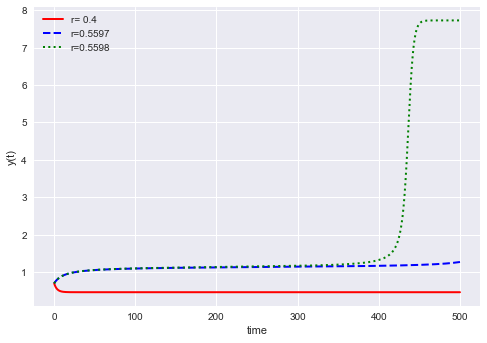

In [22]:
# initial condition
x0 = 0.7

# time points
t = np.linspace(0,500, 10000)


# parameters
r1 = 0.4
r2 = 0.5597
r3 = 0.5598

# solve ODEs

y1 = odeint(model,x0,t,args=(r1,))
y2 = odeint(model,x0,t,args=(r2,))
y3 = odeint(model,x0,t,args=(r3,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='r= {}'.format( r1) )
plt.plot(t,y2,'b--',linewidth=2,label='r={}'.format(r2))
plt.plot(t,y3,'g:',linewidth=2,label='r={}'.format(r3))
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()


